In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point


In [110]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.717070,139.826080,Entire home/apt,13000.0,3,183,2024-12-12,1.13,1,156,9,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.738440,139.769170,Private room,9474.0,3,264,2024-12-01,1.79,1,209,15,M130000243
2,905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.678780,139.678470,Entire home/apt,39363.0,5,242,2024-12-15,1.69,8,273,42,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.658000,139.671340,Private room,26571.0,2,271,2024-12-10,1.90,1,46,11,M130001107
4,1196177,Homestay at Host's House - Senju-Ohashi Station,5686404,Yukiko,NaN,Adachi Ku,35.743630,139.798520,Private room,10571.0,2,135,2024-12-19,0.97,1,69,26,M130007760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,1318814961432616144,#34新筑公寓 山手线车站徒步7分钟 直达新宿 池袋 秋叶原等,564793249,照颖,NaN,Toshima Ku,35.736506,139.732397,Entire home/apt,12000.0,1,1,2024-12-29,1.00,4,48,1,M130003233
21054,1318818845388469194,新宿中心 | 舒适的客房、齐全的设施、便利的交通、距离山手线新大久保站7分钟,667881905,Akemi,NaN,Shinjuku Ku,35.700940,139.704670,Entire home/apt,15548.0,2,0,NaN,NaN,11,128,0,M130044711
21055,1318819693625244360,#43 新筑公寓 山手线车站徒步8分钟 直达新宿 涉谷 秋叶原等,564793249,照颖,NaN,Toshima Ku,35.736653,139.733272,Entire home/apt,12000.0,1,0,NaN,NaN,4,61,0,M130003235
21056,1318896364828476774,渋谷14分/新宿6分/代田橋駅3分/都心アクセス抜群の快適ステイ,533627789,Manabu,NaN,Suginami Ku,35.672174,139.660086,Entire home/apt,16183.0,3,0,NaN,NaN,3,312,0,Hotels and Inns Business Act | 世田谷区世田谷保健所 | 6世...


In [111]:
df.shape

(21058, 18)

In [112]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,13000.0,3,183,2024-12-12,1.13,1,156,9,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,9474.0,3,264,2024-12-01,1.79,1,209,15,M130000243
2,905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,39363.0,5,242,2024-12-15,1.69,8,273,42,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.65800,139.67134,Private room,26571.0,2,271,2024-12-10,1.90,1,46,11,M130001107
4,1196177,Homestay at Host's House - Senju-Ohashi Station,5686404,Yukiko,NaN,Adachi Ku,35.74363,139.79852,Private room,10571.0,2,135,2024-12-19,0.97,1,69,26,M130007760


In [113]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [114]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [115]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
id                                    0
name                                  0
host_id                               0
host_name                             4
neighbourhood_group               21058
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              2259
minimum_nights                        0
number_of_reviews                     0
last_review                        2883
reviews_per_month                  2883
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                              17
dtype: int64


In [116]:
# Calculate percentage of missing values
print("\nPercentage of missing values:")
perc = round(df.isnull().sum() / len(df), 2) * 100

# Filter and display columns with missing values
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
neighbourhood_group    100.0
price                   11.0
last_review             14.0
reviews_per_month       14.0
dtype: float64


In [117]:
# Drop columns with >50% missing values
df = df.drop(columns=['neighbourhood_group'])
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.717070,139.826080,Entire home/apt,13000.0,3,183,2024-12-12,1.13,1,156,9,M130003350
1,776070,Kero-kero house room 1,801494,Kei,Kita Ku,35.738440,139.769170,Private room,9474.0,3,264,2024-12-01,1.79,1,209,15,M130000243
2,905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,4847803,Best Stay In Tokyo!,Shibuya Ku,35.678780,139.678470,Entire home/apt,39363.0,5,242,2024-12-15,1.69,8,273,42,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,Setagaya Ku,35.658000,139.671340,Private room,26571.0,2,271,2024-12-10,1.90,1,46,11,M130001107
4,1196177,Homestay at Host's House - Senju-Ohashi Station,5686404,Yukiko,Adachi Ku,35.743630,139.798520,Private room,10571.0,2,135,2024-12-19,0.97,1,69,26,M130007760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,1318814961432616144,#34新筑公寓 山手线车站徒步7分钟 直达新宿 池袋 秋叶原等,564793249,照颖,Toshima Ku,35.736506,139.732397,Entire home/apt,12000.0,1,1,2024-12-29,1.00,4,48,1,M130003233
21054,1318818845388469194,新宿中心 | 舒适的客房、齐全的设施、便利的交通、距离山手线新大久保站7分钟,667881905,Akemi,Shinjuku Ku,35.700940,139.704670,Entire home/apt,15548.0,2,0,NaN,NaN,11,128,0,M130044711
21055,1318819693625244360,#43 新筑公寓 山手线车站徒步8分钟 直达新宿 涉谷 秋叶原等,564793249,照颖,Toshima Ku,35.736653,139.733272,Entire home/apt,12000.0,1,0,NaN,NaN,4,61,0,M130003235
21056,1318896364828476774,渋谷14分/新宿6分/代田橋駅3分/都心アクセス抜群の快適ステイ,533627789,Manabu,Suginami Ku,35.672174,139.660086,Entire home/apt,16183.0,3,0,NaN,NaN,3,312,0,Hotels and Inns Business Act | 世田谷区世田谷保健所 | 6世...


In [118]:
df = df.dropna()
df


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.717070,139.826080,Entire home/apt,13000.0,3,183,2024-12-12,1.13,1,156,9,M130003350
1,776070,Kero-kero house room 1,801494,Kei,Kita Ku,35.738440,139.769170,Private room,9474.0,3,264,2024-12-01,1.79,1,209,15,M130000243
2,905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,4847803,Best Stay In Tokyo!,Shibuya Ku,35.678780,139.678470,Entire home/apt,39363.0,5,242,2024-12-15,1.69,8,273,42,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,Setagaya Ku,35.658000,139.671340,Private room,26571.0,2,271,2024-12-10,1.90,1,46,11,M130001107
4,1196177,Homestay at Host's House - Senju-Ohashi Station,5686404,Yukiko,Adachi Ku,35.743630,139.798520,Private room,10571.0,2,135,2024-12-19,0.97,1,69,26,M130007760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,1314993249042079878,山手线莺谷站 4B 两人公寓 直达上野 秋叶原 银座 浅草,44425048,Hong,Taito Ku,35.725557,139.782489,Entire home/apt,13086.0,1,1,2024-12-22,1.00,16,346,1,Hotels and Inns Business Act | 東京都台東区台東保健所 | 6...
20972,1315028135914678393,2 minfrom Kitaikebukuro Sta/Ikebukuro area/ 2 ppl,42244167,浩史,Toshima Ku,35.740010,139.714700,Entire home/apt,11636.0,1,1,2024-12-27,1.00,120,174,1,M130043078
20983,1315489999565629730,Shinjuku7min Shibuya5min | Heartwarming Host #3,457838974,Yumi,Shibuya Ku,35.683806,139.700254,Entire home/apt,35314.0,3,1,2024-12-28,1.00,4,2,1,M130045367
21011,1319308449740472965,F209【新宿近い】渋谷区人気エリア/1R/家族旅行最適/東京/夜景綺麗,572982274,林,Shibuya Ku,35.685815,139.679233,Entire home/apt,25451.0,2,1,2024-12-29,1.00,5,177,1,M130046484


In [119]:
# Filter and display columns with missing values
missing_columns = perc[perc > 0]
print(missing_columns)

neighbourhood_group    100.0
price                   11.0
last_review             14.0
reviews_per_month       14.0
dtype: float64


In [120]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\hajji\AppData\Local\Temp\ipykernel_4972\2337335738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [121]:
df['price'] = df['price'].fillna(df['price'].median())



C:\Users\hajji\AppData\Local\Temp\ipykernel_4972\3960221268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].fillna(df['price'].median())


In [122]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [123]:
df.price.describe()

count    1.619800e+04
mean     3.024632e+04
std      1.589829e+05
min      1.600000e+03
25%      1.438700e+04
50%      2.137300e+04
75%      3.400000e+04
max      1.578988e+07
Name: price, dtype: float64

C:\Users\hajji\AppData\Local\Temp\ipykernel_4972\3065094083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]


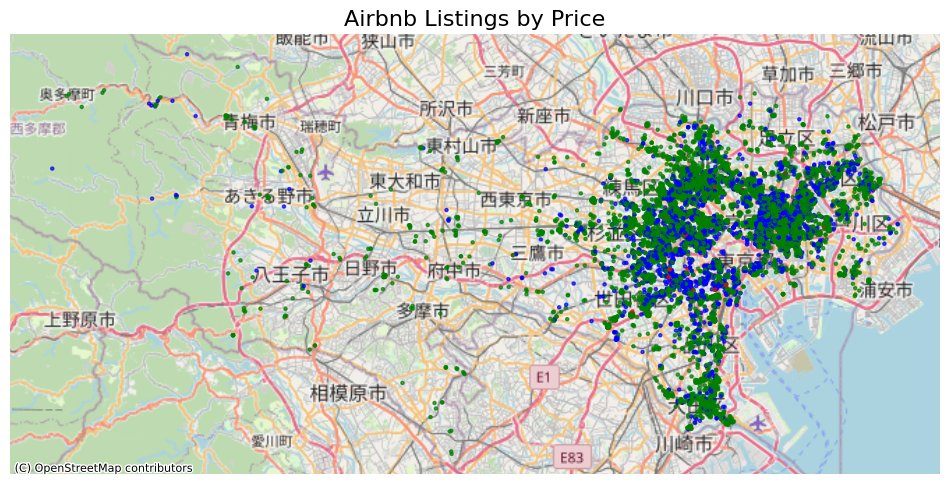

In [124]:
# Convert latitude and longitude into Point geometries
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Assign colors based on price
gdf['color'] = gdf['price'].apply(lambda p: 'green' if p < 3.400000e+04 else 'blue' if p < 1.589829e+05 else 'red')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()


In [ ]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

print("\nOutlier prices:")
print(outliers['price'].describe())

#  Remove outliers
listings_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


Number of outliers in 'price': 973

Outlier prices:
count    9.730000e+02
mean     1.333568e+05
std      6.381615e+05
min      6.342900e+04
25%      7.142900e+04
50%      8.395300e+04
75%      1.000000e+05
max      1.578988e+07
Name: price, dtype: float64


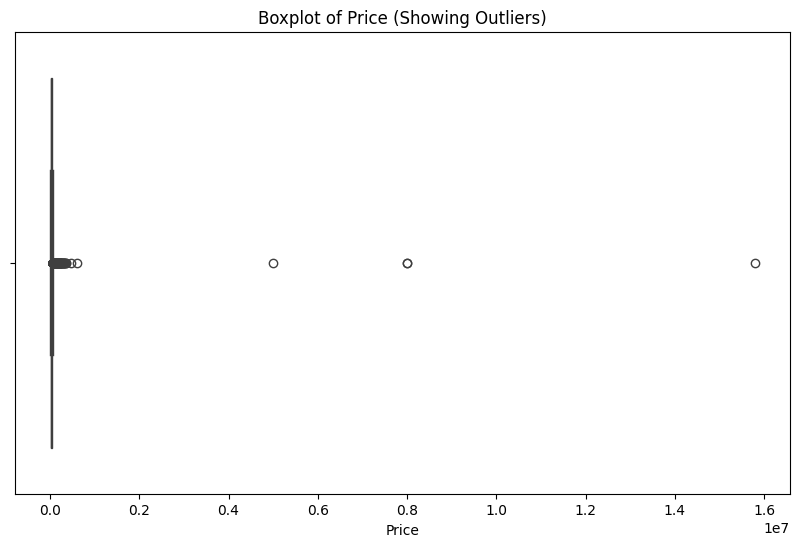

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

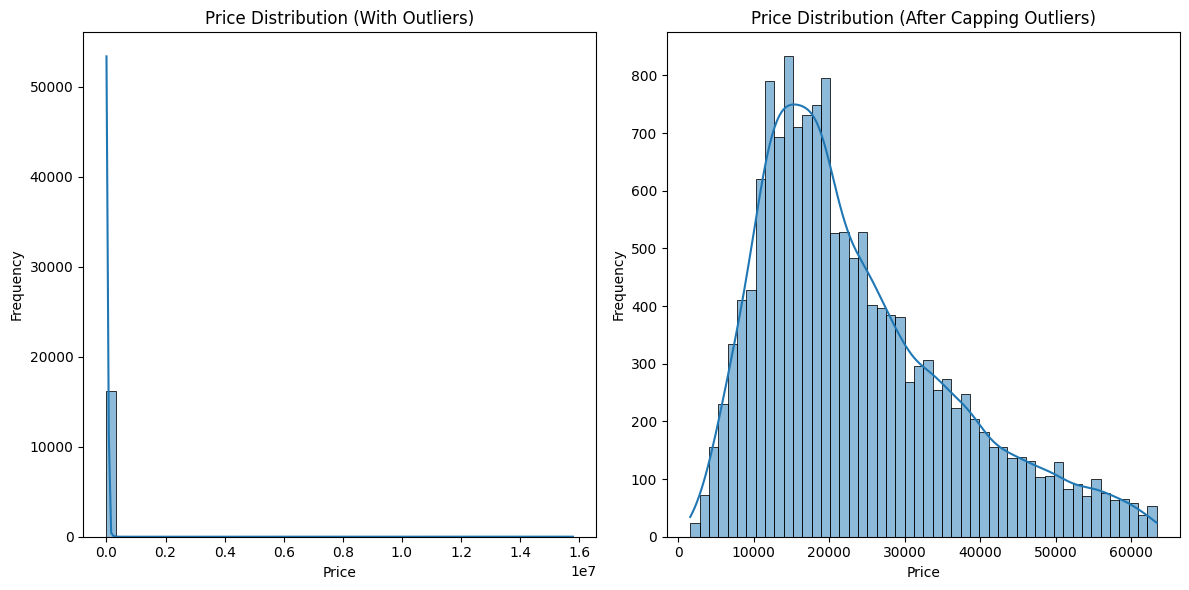

In [128]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Price distribution after handling outliers

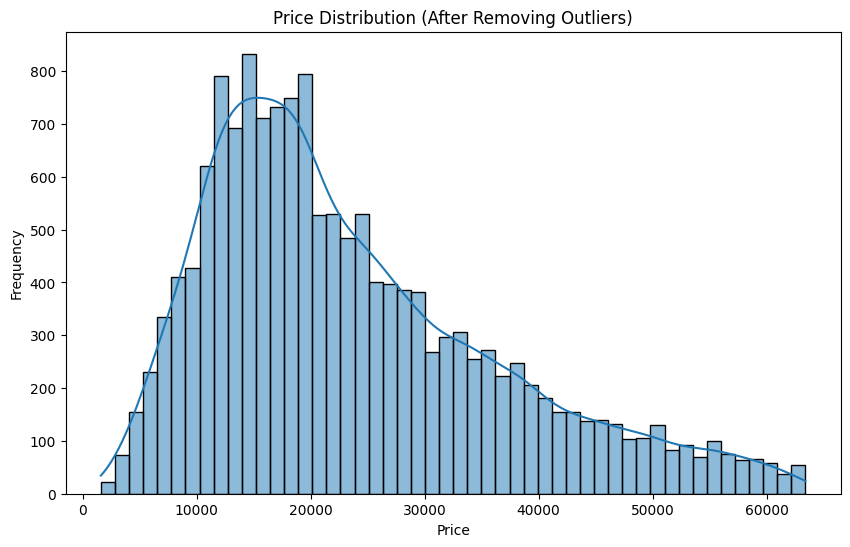

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

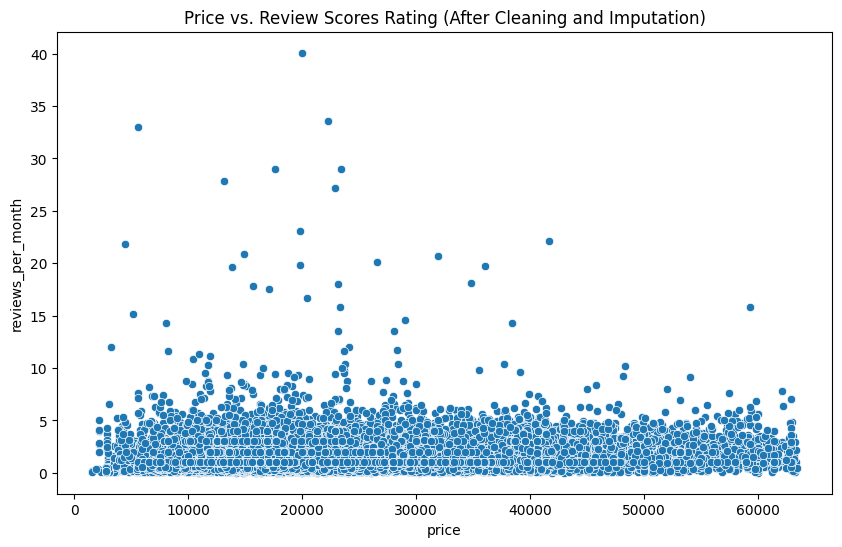

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews_per_month', data=listings_cleaned)
plt.title('Price vs. Review Scores Rating (After Cleaning and Imputation)')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.show()

In [135]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,geometry
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.717070,139.826080,Entire home/apt,13000.0,3,183,2024-12-12,1.13,1,156,9,M130003350,POINT (139.82608 35.71707)
1,776070,Kero-kero house room 1,801494,Kei,Kita Ku,35.738440,139.769170,Private room,9474.0,3,264,2024-12-01,1.79,1,209,15,M130000243,POINT (139.76917 35.73844)
2,905944,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,4847803,Best Stay In Tokyo!,Shibuya Ku,35.678780,139.678470,Entire home/apt,39363.0,5,242,2024-12-15,1.69,8,273,42,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,POINT (139.67847 35.67878)
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,Setagaya Ku,35.658000,139.671340,Private room,26571.0,2,271,2024-12-10,1.90,1,46,11,M130001107,POINT (139.67134 35.658)
4,1196177,Homestay at Host's House - Senju-Ohashi Station,5686404,Yukiko,Adachi Ku,35.743630,139.798520,Private room,10571.0,2,135,2024-12-19,0.97,1,69,26,M130007760,POINT (139.79852 35.74363)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20971,1314993249042079878,山手线莺谷站 4B 两人公寓 直达上野 秋叶原 银座 浅草,44425048,Hong,Taito Ku,35.725557,139.782489,Entire home/apt,13086.0,1,1,2024-12-22,1.00,16,346,1,Hotels and Inns Business Act | 東京都台東区台東保健所 | 6...,POINT (139.78248906420794 35.72555703708292)
20972,1315028135914678393,2 minfrom Kitaikebukuro Sta/Ikebukuro area/ 2 ppl,42244167,浩史,Toshima Ku,35.740010,139.714700,Entire home/apt,11636.0,1,1,2024-12-27,1.00,120,174,1,M130043078,POINT (139.7147 35.74001)
20983,1315489999565629730,Shinjuku7min Shibuya5min | Heartwarming Host #3,457838974,Yumi,Shibuya Ku,35.683806,139.700254,Entire home/apt,35314.0,3,1,2024-12-28,1.00,4,2,1,M130045367,POINT (139.7002543 35.6838058)
21011,1319308449740472965,F209【新宿近い】渋谷区人気エリア/1R/家族旅行最適/東京/夜景綺麗,572982274,林,Shibuya Ku,35.685815,139.679233,Entire home/apt,25451.0,2,1,2024-12-29,1.00,5,177,1,M130046484,POINT (139.679233 35.6858147)


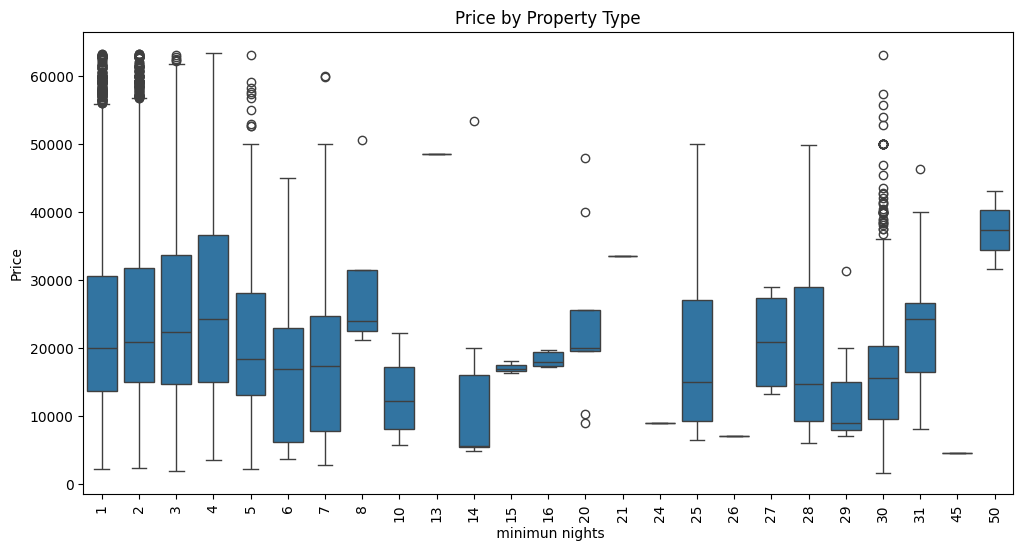

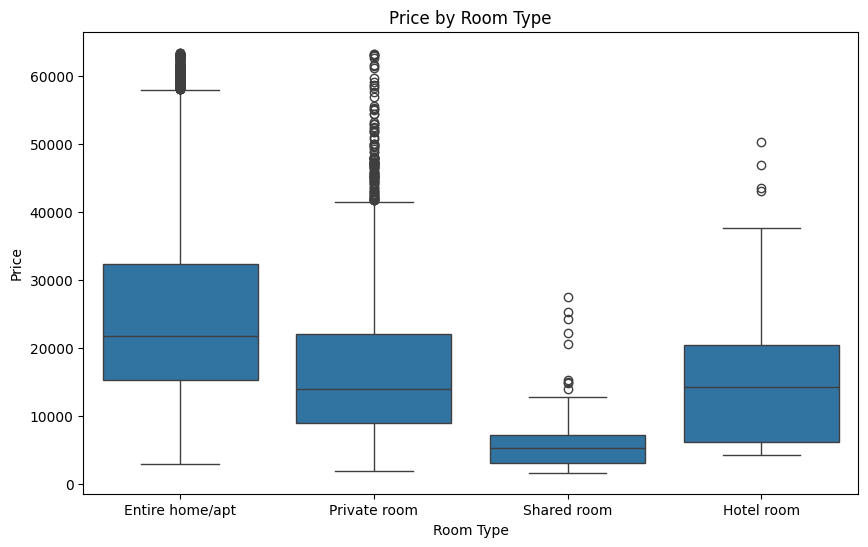

In [139]:
# Price by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='minimum_nights', y='price', data=listings_cleaned)
plt.title('Price by Property Type')
plt.xlabel(' minimun nights')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [140]:
import numpy as np

def calculate_bins(data, method='sturges'):
    """
    Calculate the number of bins for a histogram based on the specified method.

    Parameters:
        data (array-like): The dataset for which bins are to be calculated.
        method (str): The method to use for calculating bins. Options are:
                      - 'sturges' (default): Sturges' Rule
                      - 'sqrt': Square Root Rule
                      - 'fd': Freedman-Diaconis Rule

    Returns:
        int: The number of bins.
    """
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [141]:
sbins       = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins   = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins     = calculate_bins(listings_cleaned.price , method = 'fd')

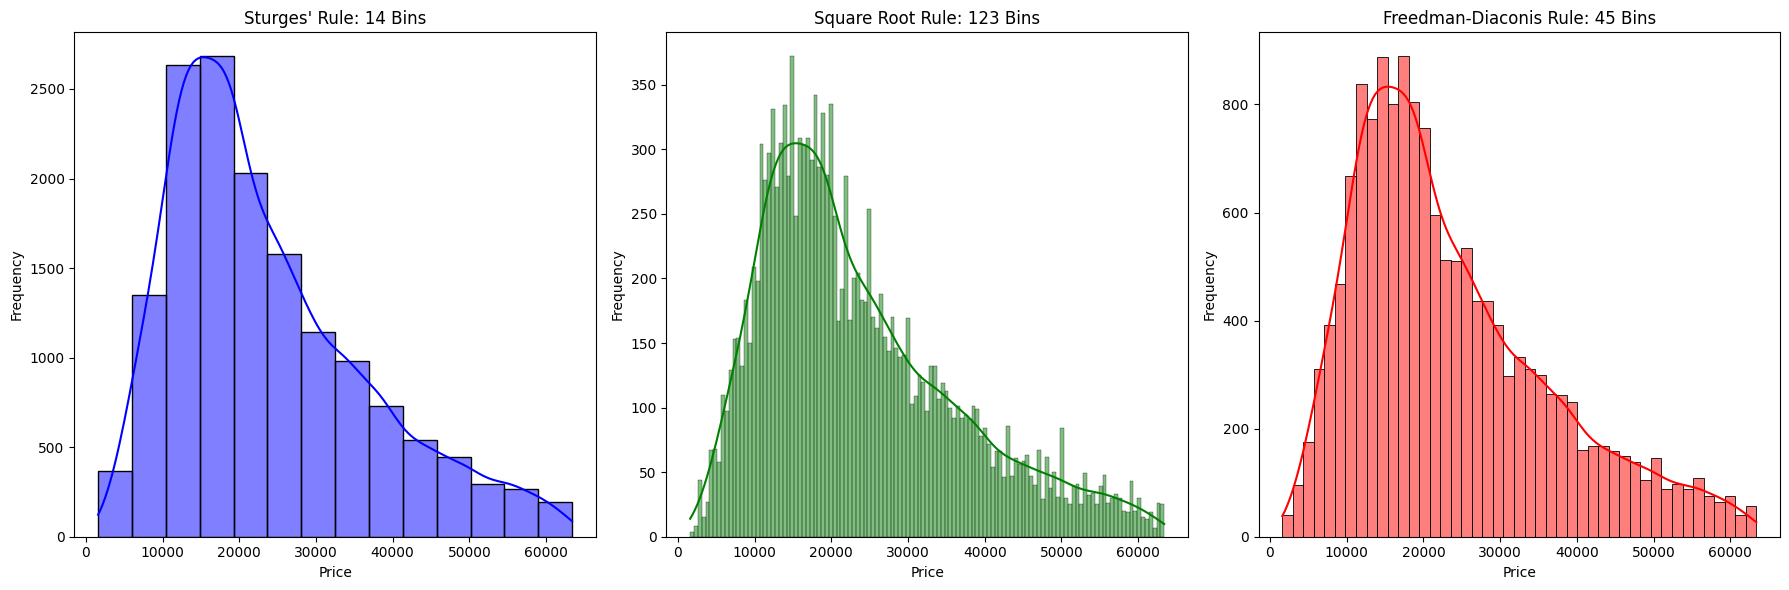

In [142]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



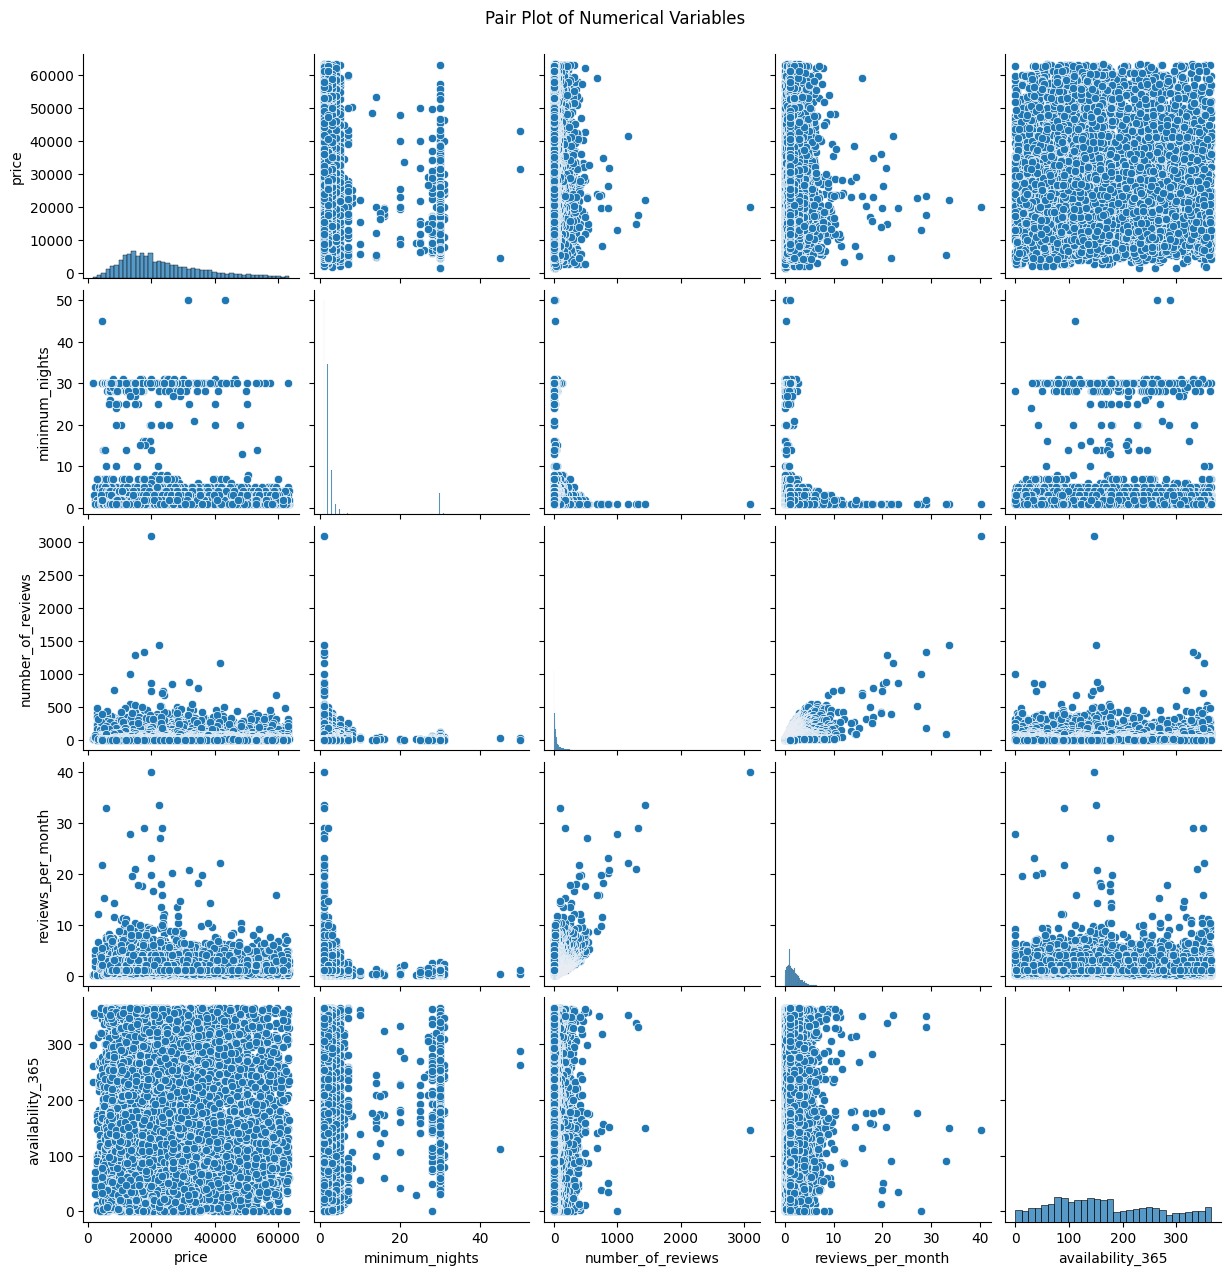

In [143]:


# Select numerical columns for pair plot
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create pair plot
sns.pairplot(listings_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

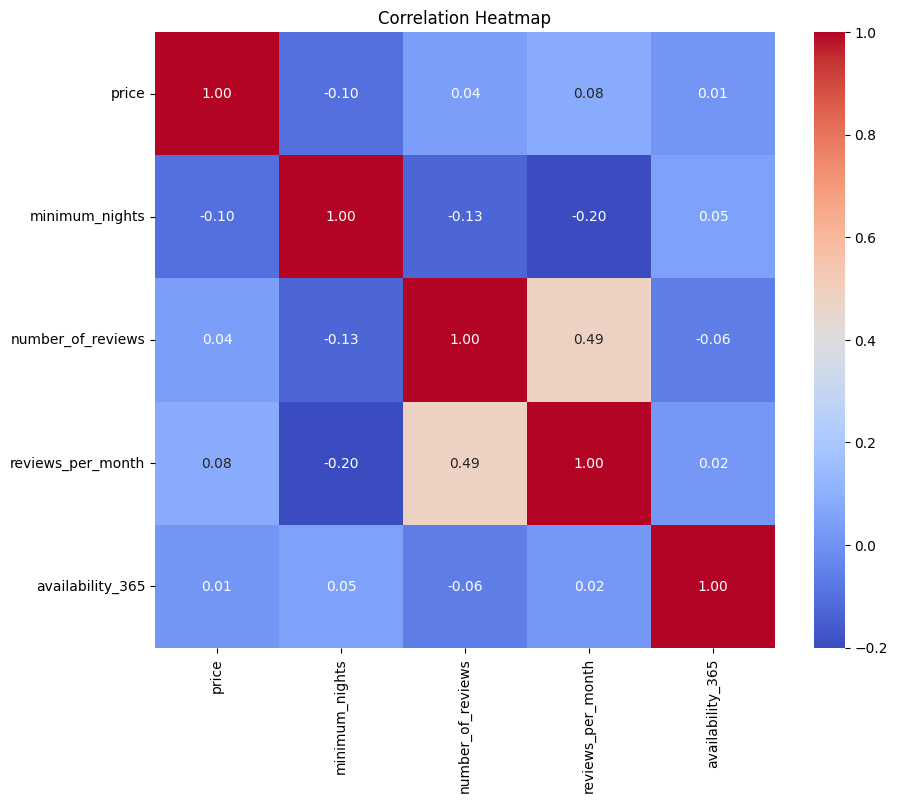

In [144]:
# Calculate correlation matrix
corr_matrix = listings_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

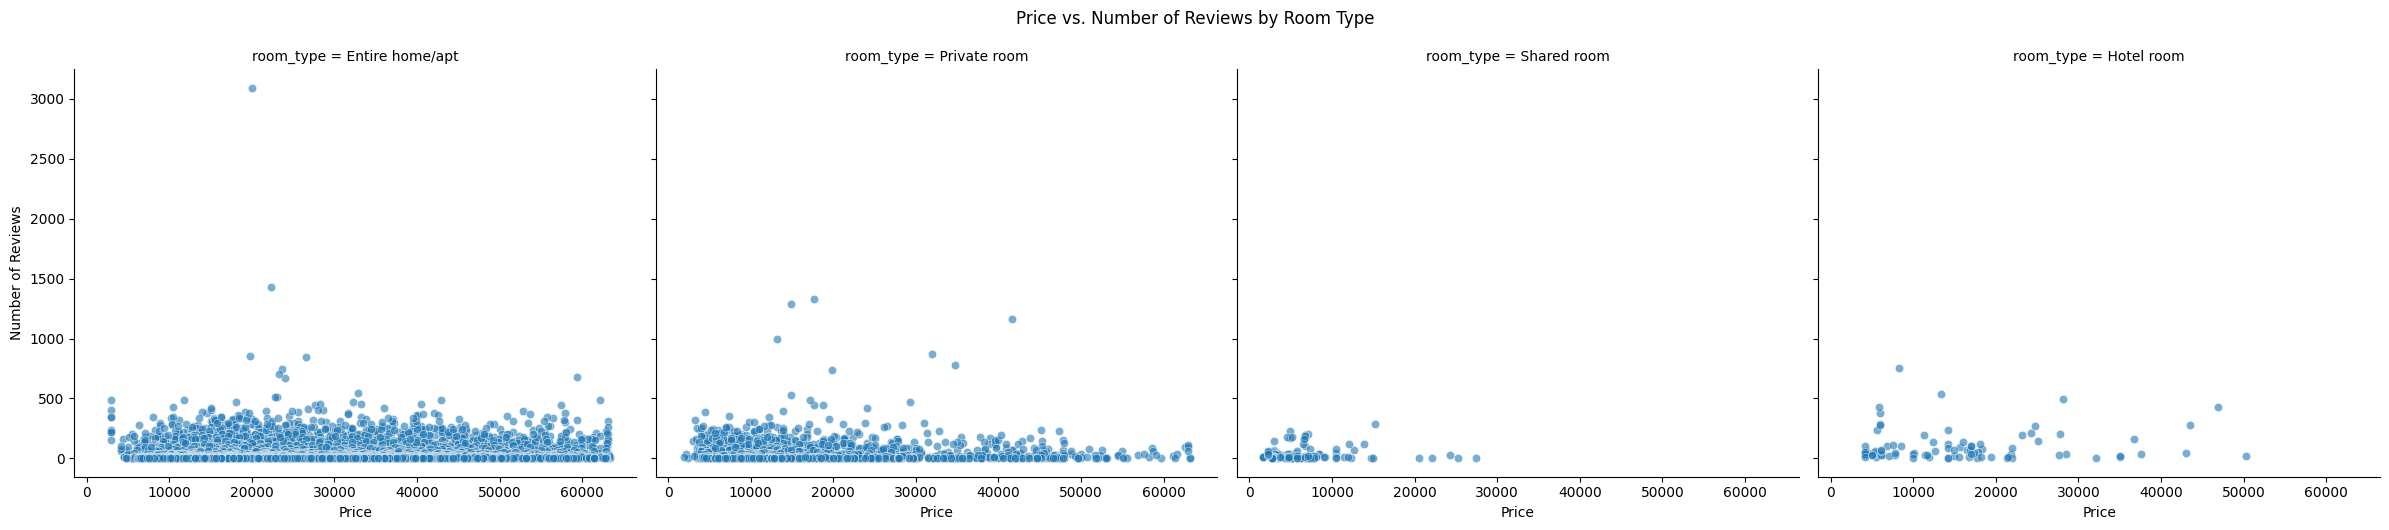

In [ ]:
# Faceted scatter plot: Price vs. Numbe²r of Reviews, faceted by Room Type
g = sns.FacetGrid(listings_cleaned, col='room_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'price', 'number_of_reviews', alpha=0.6)
g.set_axis_labels('Price', 'Number of Reviews')
g.fig.suptitle('Price vs. Number of Reviews by Room Type', y=1.05)
plt.show()